In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import pickle

In [42]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [43]:
print("Shape of Training data: ", df_train.shape)
print("Shape of Testing data: ", df_test.shape)

Shape of Training data:  (20800, 5)
Shape of Testing data:  (5200, 4)


In [44]:
class_labels  = df_train['label'].values.tolist()
class_labels_set = set(class_labels)

freq_list = []

for c in class_labels_set:
    freq_list.append(class_labels.count(c))

print ('Freq',freq_list)
print ('number',class_labels_set)

Freq [10387, 10413]
number {0, 1}


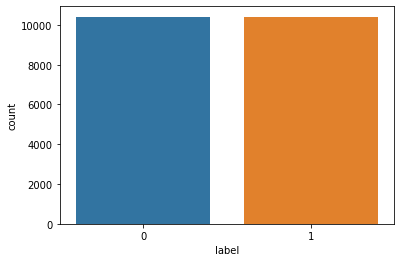

In [45]:
import seaborn as sns
ax = sns.countplot(x="label",data=df_train)

In [46]:
df_train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [47]:
df_train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [48]:
df = df_train.drop(["id", "title", "author"], axis = 1)

In [49]:
print("Null values in train data:")
print(df_train.isnull().sum())
print('\n\n')

print("Null values in test data:")
print(df_test.isnull().sum())

Null values in train data:
id           0
title      558
author    1957
text        39
label        0
dtype: int64



Null values in test data:
id          0
title     122
author    503
text        7
dtype: int64


In [50]:
df_d= df.dropna()

In [51]:
df_d.isnull().sum()

text     0
label    0
dtype: int64

In [52]:
df=df_d

In [53]:
df = df.sample(frac = 1)

In [54]:
df.head(10)

,text,label
10281,Black Female Trump Executive Publishes Persona...,1
9588,Breitbart News Senior Editor MILO claimed that...,0
10896,"The political news cycle is fast, and keeping ...",0
15739,"OfTwoMinds.com November 1, 2016 \nThe Deep Sta...",1
12683,“People are not happy. BIG lines. What is goin...,1
12316,I’m a fairly big guy — with plenty of ma...,0
5954,"In the late 1990s, General Motors got an unexp...",0
12164,Dow higher as Boeing gains offset Apple's fall...,1
5649,Fox Host Jeanine Pirro: FBI ‘Disgraces And Pol...,1
6322,VIA American News “I didn’t share them when th...,1


In [55]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [56]:
df.columns

Index(['text', 'label'], dtype='object')

In [57]:
df.head()

,text,label
0,Black Female Trump Executive Publishes Persona...,1
1,Breitbart News Senior Editor MILO claimed that...,0
2,"The political news cycle is fast, and keeping ...",0
3,"OfTwoMinds.com November 1, 2016 \nThe Deep Sta...",1
4,“People are not happy. BIG lines. What is goin...,1


In [58]:
x = df["text"]
y = df["label"]
x.shape, y.shape

((20761,), (20761,))

In [59]:
x

0        Black Female Trump Executive Publishes Persona...
1        Breitbart News Senior Editor MILO claimed that...
2        The political news cycle is fast, and keeping ...
3        OfTwoMinds.com November 1, 2016 \nThe Deep Sta...
4        “People are not happy. BIG lines. What is goin...
                               ...                        
20756    NBC is making major changes to its   Today mor...
20757    Friday on Fox News Channel’s “America’s Newsro...
20758    Gregg Prescott, an author and editor at In5d.c...
20759    A new report has revealed that sex attacks at ...
20760    Tesla Motors, always ahead of the automotive c...
Name: text, Length: 20761, dtype: object

In [60]:
y

0        1
1        0
2        0
3        1
4        1
        ..
20756    0
20757    0
20758    1
20759    0
20760    0
Name: label, Length: 20761, dtype: int64

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=100)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
print(x_test, type(x_test))
pickle.dump(vectorization, open('vectorizer.sav', 'wb'))

3117     What if you gave a party and everybody came? T...
142      Goldman Sachs’s outsize influence in Washingto...
10810    VIPS Memos November 13, 2016 \nDonald Trump’s ...
2639     When   Donald J. Trump spoke on the phone with...
10977    Former Central Intelligence Agency (CIA) and N...
                               ...                        
10590    Written by James Bovard   2016 election campai...
10828    A comedian has agreed to speak at this year’s ...
12738    Leave a reply \nDiane Canfield – The biggest s...
15094    Posted on October 27, 2016 by DavidSwanson \nA...
939      22 Shares\n8 13 0 1\nAs Donald Trump gains mor...
Name: text, Length: 8305, dtype: object <class 'pandas.core.series.Series'>


In [64]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
filename = 'logisticRegression.sav'
pickle.dump(LR, open(filename, 'wb'))
check = vectorization.transform([""])
# print(check)
print(LR.predict(check))
pred_lr=LR.predict(xv_test)

[1]


In [68]:
LR.score(xv_test, y_test)

0.9424443106562311

In [69]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4125
           1       0.94      0.95      0.94      4180

    accuracy                           0.94      8305
   macro avg       0.94      0.94      0.94      8305
weighted avg       0.94      0.94      0.94      8305



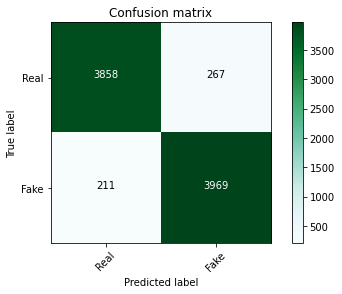

In [70]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

## MultinomialNB

In [71]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)
filename = 'multinomialNB.sav'
pickle.dump(NB, open(filename, 'wb'))

pred = NB.predict(xv_test)
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(xv_test, y_test)))

Accuracy of NB classifier on test set: 0.81


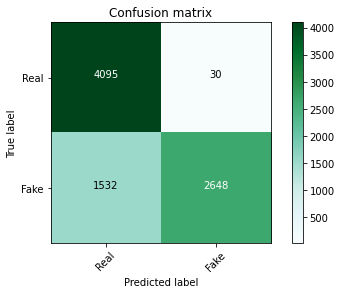

In [72]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84      4125
           1       0.99      0.63      0.77      4180

    accuracy                           0.81      8305
   macro avg       0.86      0.81      0.81      8305
weighted avg       0.86      0.81      0.81      8305



## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
filename = 'DecisionTree.sav'
pickle.dump(DT, open(filename, 'wb'))


In [76]:
pred_dt = DT.predict(xv_test)

In [77]:
DT.score(xv_test, y_test)

0.8801926550270921

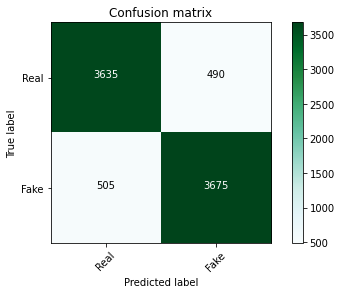

In [78]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [79]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4125
           1       0.88      0.88      0.88      4180

    accuracy                           0.88      8305
   macro avg       0.88      0.88      0.88      8305
weighted avg       0.88      0.88      0.88      8305



## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xv_train, y_train)
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.6539434075857917
              precision    recall  f1-score   support

           0       0.95      0.32      0.48      4125
           1       0.59      0.98      0.74      4180

    accuracy                           0.65      8305
   macro avg       0.77      0.65      0.61      8305
weighted avg       0.77      0.65      0.61      8305



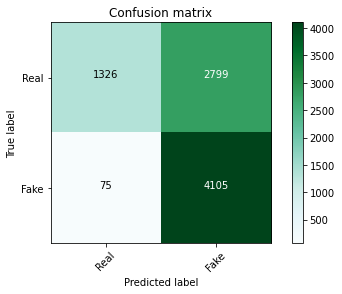

In [81]:
#k=3
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [82]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
print(knn.score(xv_test, y_test))
print(classification_report(y_test, pred_knn))

0.7087296809151113
              precision    recall  f1-score   support

           0       0.90      0.46      0.61      4125
           1       0.64      0.95      0.77      4180

    accuracy                           0.71      8305
   macro avg       0.77      0.71      0.69      8305
weighted avg       0.77      0.71      0.69      8305



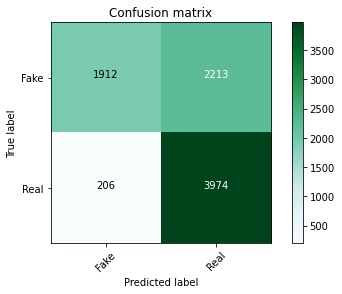

In [83]:
cm = metrics.confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [84]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
pac.fit(xv_train,y_train)
filename = 'passiveAggressive.sav'
pickle.dump(pac, open(filename, 'wb'))


In [85]:
y_pac=pac.predict(xv_test)

In [86]:
accuracy_score(y_test,y_pac)

0.9625526791089705